# Outline 

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-numerical-variables)


### Loading the dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl 
plt.style.use("dark_background")

In [8]:
df = pd.read_csv("../input/credit_dataset.csv", index_col=0)

In [9]:
df = df.sample(frac=1).reset_index(drop=True) # randomly shuffle rows of the df
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,32,107800,OWN,3.0,EDUCATION,C,5200,14.65,0,0.05,Y,8
1,22,36000,RENT,4.0,MEDICAL,B,4200,9.91,1,0.12,N,2
2,23,130000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6000,5.79,0,0.05,N,3
3,37,146000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,10000,13.99,0,0.07,Y,16
4,31,89000,MORTGAGE,15.0,EDUCATION,B,14000,10.65,0,0.16,N,10


In [10]:
# Check for amount of rows and for any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
#create quickaccess list with categorical variables labels
catvars = list(df.select_dtypes(include = 'object').columns)
#create quickaccess list with numerical variables labels
numvars = list(df.select_dtypes(exclude = 'object').columns)
numvars.remove("loan_status")

In [12]:
# Threshold, splitting 70% train, 30% testing
threshold = 0.7*len(df)

# Splitting the dataset
df_train = df.loc[:threshold].reset_index(drop=True)
df_test = df.loc[threshold:].reset_index(drop=True)

In [13]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22807 training samples
We have 9774 testing samples


### 1.2 Adding a new categorical feature

In [14]:
# Describe numerical features of the training set
df_train[numvars]
df_train[numvars].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22807.000000,2.280700e+04,22807.000000,22807.000000,22807.000000,22807.000000,22807.000000
mean,27.724690,6.618340e+04,4.762178,9612.829394,11.008255,0.170756,5.798614
std,6.317994,6.590959e+04,4.125115,6330.679138,3.081367,0.107178,4.034231
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.942800e+04,7.000000,12275.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


---
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.
---

In [15]:
df_train["person_income"].describe()

count    2.280700e+04
mean     6.618340e+04
std      6.590959e+04
min      4.080000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.942800e+04
max      6.000000e+06
Name: person_income, dtype: float64

In [16]:
# Income intervals
intervals = (0, 39000, 55000, 79000, 6000000)
# Categories
categories = ["D", "C", "B", "A"]
# Create the new feature
df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)
df_test["category_income"] = pd.cut(df_test.person_income, intervals, labels=categories)
# Add the new category `category_income` to the list of categorical variables
catvars.append("category_income")

# 2. Visualization

In [17]:
# The different values of person_home_ownsership
df_train["person_home_ownership"].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'OTHER'], dtype=object)

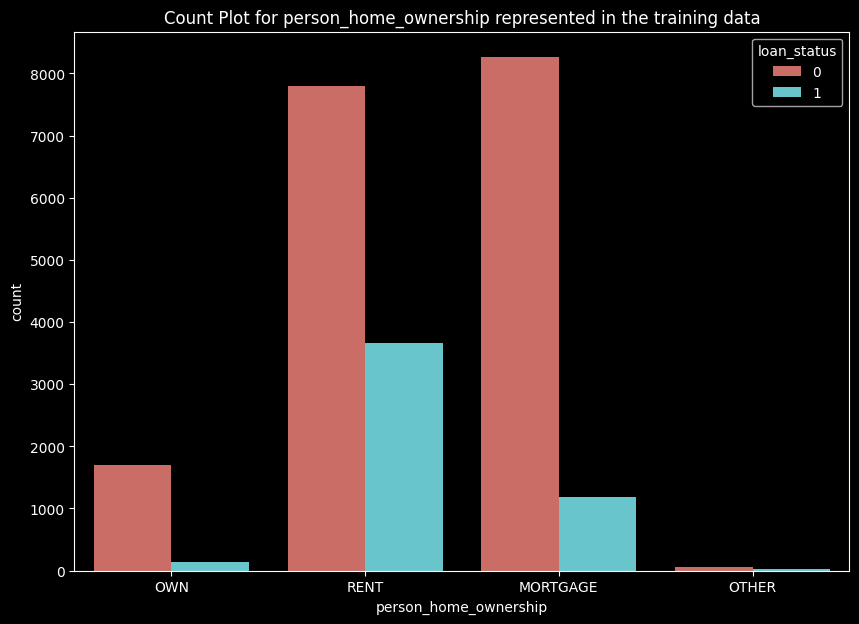

In [18]:
fig = plt.figure(figsize=(10, 7))
g = sns.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
g.set_title("Count Plot for person_home_ownership represented in the training data")
plt.show()

### 2.2 Numerical variable distribution

Plot a univariate distribution of a numerical variable associated to the "0" and "1" targets. 

<Figure size 1400x700 with 0 Axes>

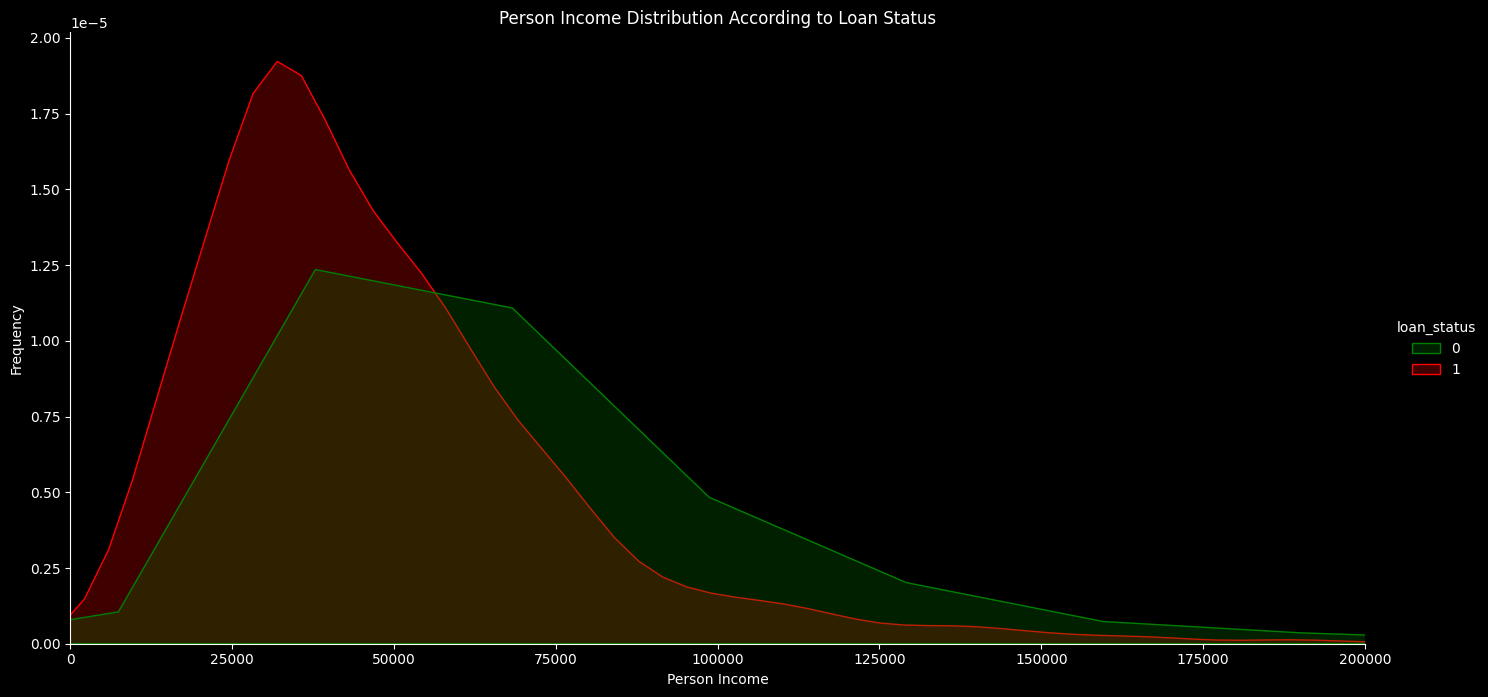

In [19]:
plt.figure(figsize=(14, 7))

sns.displot(data=df_train, x="person_income", hue="loan_status", kind="kde", 
            fill=True, common_norm=False, palette=["g", "r"], height=7, aspect=2)

plt.xlabel("Person Income")
plt.xlim(0, 200000)
plt.ylabel("Frequency")
plt.title("Person Income Distribution According to Loan Status")
plt.show()

---

We can see that the distribution of `person_income` associated the target '0' (No default) is shifted to the right, in comparison with the one associated with the target '1' (default).

---

### 2.3 Boxplots 

---

The distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`. 

---

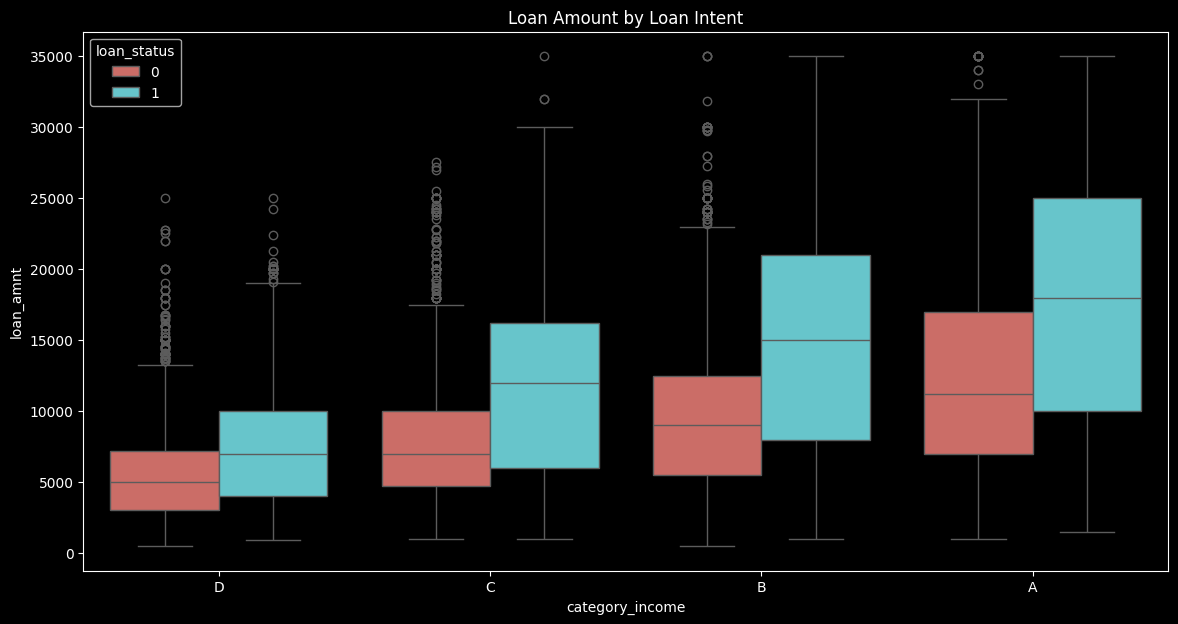

In [20]:
fig = plt.figure(figsize=(14, 7))
g = sns.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Loan Intent")
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

The categories:

In [21]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [22]:
for categorical_variable in catvars:
  print(f"Feature: {categorical_variable} ... Categories: {df_train[categorical_variable].unique()}")

Feature: person_home_ownership ... Categories: ['OWN' 'RENT' 'MORTGAGE' 'OTHER']
Feature: loan_intent ... Categories: ['EDUCATION' 'MEDICAL' 'DEBTCONSOLIDATION' 'VENTURE' 'PERSONAL'
 'HOMEIMPROVEMENT']
Feature: loan_grade ... Categories: ['C' 'B' 'A' 'E' 'D' 'F' 'G']
Feature: cb_person_default_on_file ... Categories: ['Y' 'N']
Feature: category_income ... Categories: ['A', 'D', 'B', 'C']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


The number of categories:

In [23]:
# For each categorical variable, the number of possible categories
df_train[catvars].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

In [24]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables 
df_train.shape

(22807, 13)

In [26]:
# Fit the encoder on the categorical columns of the training data and then use that fitted encoder to transform test data
# Ensure consistency in how categorical variables are handled between training and test sets
def get_one_hot_enc(encoder, dataset, variables = catvars): 
    encoded_data = encoder.transform(dataset[variables])
    df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(variables))
    concat_df = pd.concat([dataset.drop(columns=variables), df], axis=1)
    return concat_df

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(df_train[catvars])

df_train = get_one_hot_enc(encoder, df_train)
df_test = get_one_hot_enc(encoder, df_test)


c:\Users\d80111\Documents\Imperial_MSc_Machine_Learning\Personal-learnings\consumer_loans\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# check shape of the modified train data
df_train.shape

(22807, 26)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables 
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7. 

* One column for the target `loan_status`. 

* Total number of columns: 26 

* Recall that one category for each categorical variable is dropped to avoid multicollinearity 
---

### 3.2 Preprocessing Numerical Variables

In [42]:
df_train_targets = df_train['loan_status']
df_train_features = df_train.drop('loan_status', axis=1)

df_test_targets = df_test['loan_status']
df_test_features = df_test.drop('loan_status', axis=1)

In [43]:
# df_train_features_numvars and df_test_features_numvars containing the training and testing numerical features
# df_train_features_rest and df_train_features_rest containing the rest of the features.
df_train_features_numvars = df_train_features[numvars]
df_train_features_rest = df_train_features[df_train_features.columns[~df_train_features.columns.isin(numvars)]]


df_test_features_numvars = df_test_features[numvars]
df_test_features_rest = df_test_features[df_test_features.columns[~df_test_features.columns.isin(numvars)]]

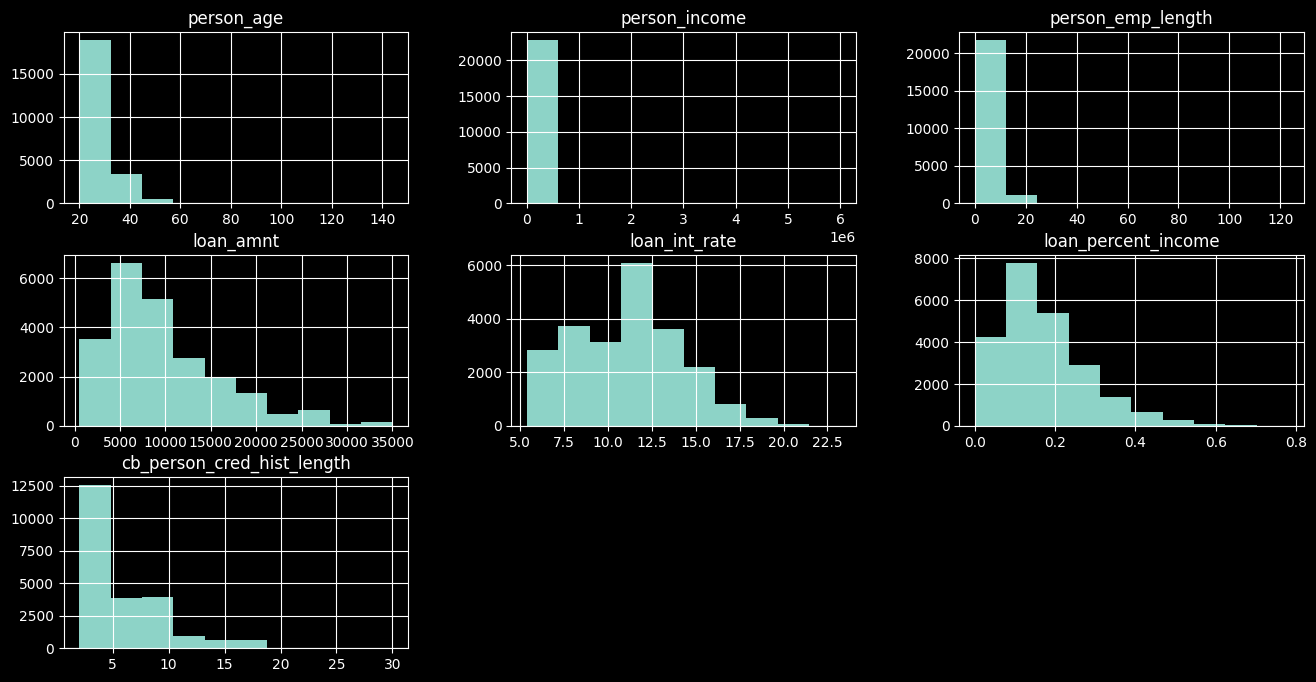

In [44]:
# plot the numerical variables to view the data distribution
df_train_features_numvars.hist(figsize=(16, 8))
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Instantiate models
standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

# Fit and Transform the training numerical variables using StandardScaler
df_train_features_numvars_std = pd.DataFrame(standard_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using StandardScaler
df_test_features_numvars_std = pd.DataFrame(standard_scaler.transform(df_test_features_numvars)) 

# Fit and Transform the training numerical variables using MinMaxScaler
# df_train_features_numvars_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using MinMaxScaler
# df_test_features_numvars_minmax = pd.DataFrame(minmax_scaler.transform(df_test_features_numvars)) 

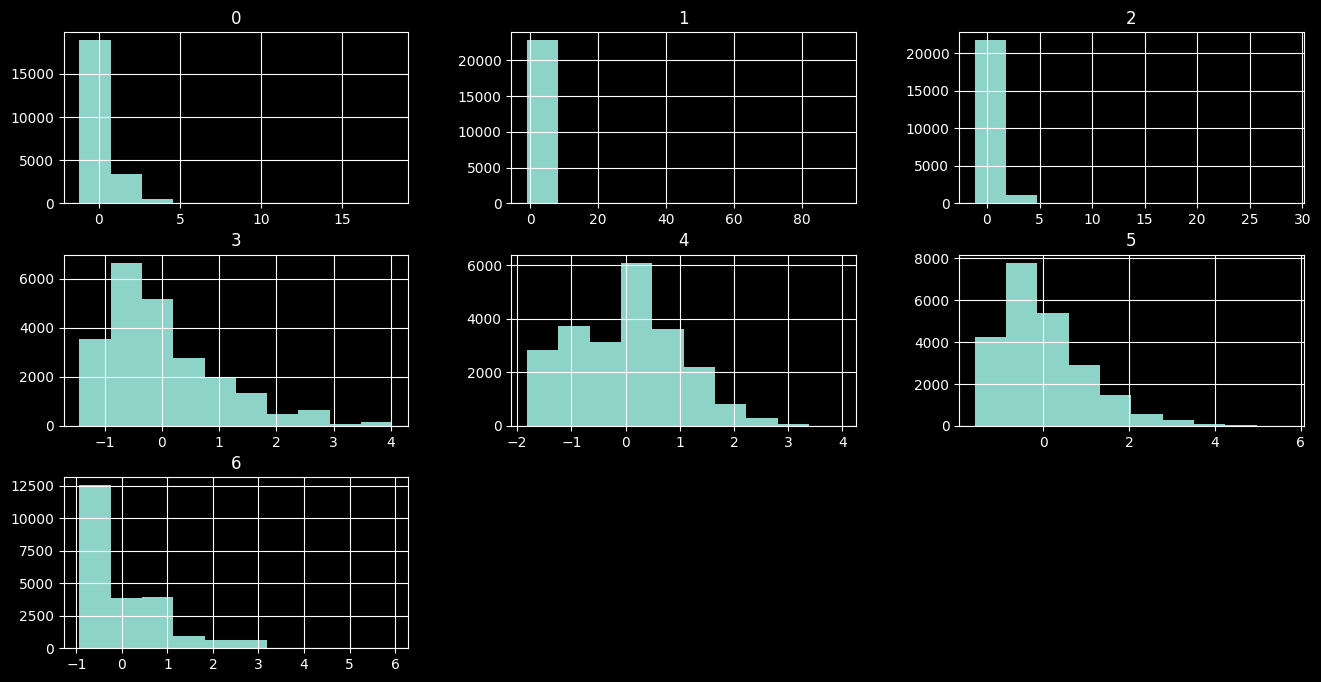

In [46]:
df_train_features_numvars_std.hist(figsize=(16, 8))
plt.show()

In [47]:
# Concatenate the processed numerical features with the df_train_features_rest
df_train_features_processed = pd.concat([df_train_features_numvars_std, df_train_features_rest], axis=1) 
df_test_features_processed = pd.concat([df_test_features_numvars_std, df_test_features_rest], axis=1)

In [49]:
# Confirm shapes of our train/test data and corresponding targets
print(f'Train data shape is {df_train_features_processed.shape}')
print(f'Train data targets shape is {df_train_targets.shape}')

print(f'Test data shape is {df_test_features_processed.shape}')
print(f'Test data targets shape is {df_test_targets.shape}')

Train data shape is (22807, 25)
Train data targets shape is (22807,)
Test data shape is (9774, 25)
Test data targets shape is (9774,)


In [50]:
# Convert the previously mentioned dfs into arrays 
X_train = df_train_features_processed.values
X_test = df_test_features_processed.values

y_train = df_train_targets.values
y_test = df_test_targets.values
